# VQLS Linear Solver 

This notebook illustrates how to use the VQLS linear solver to solve individual linear systems. We will use sparse random matrices that mimc the matrices obtained by EPANET for small water networks.

Let's define the system:

In [14]:
import scipy.sparse as sp 
import numpy as np 

# set the seed
np.random.seed(134)

# size of the linear system
size = 8

# create the matrix
A = sp.random(size,size,density=0.25)
A = (A+A.T)/2
A = A.todense()
A

matrix([[0.986, 0.   , 0.362, 0.   , 0.   , 0.   , 0.478, 0.   ],
        [0.   , 0.   , 0.376, 0.108, 0.   , 0.   , 0.   , 0.   ],
        [0.362, 0.376, 0.   , 0.   , 0.   , 0.491, 0.   , 0.179],
        [0.   , 0.108, 0.   , 0.   , 0.166, 0.   , 0.095, 0.345],
        [0.   , 0.   , 0.   , 0.166, 0.   , 0.424, 0.   , 0.396],
        [0.   , 0.   , 0.491, 0.   , 0.424, 0.912, 0.308, 0.086],
        [0.478, 0.   , 0.   , 0.095, 0.   , 0.308, 0.   , 0.   ],
        [0.   , 0.   , 0.179, 0.345, 0.396, 0.086, 0.   , 0.   ]])

In [15]:
# create the right hand side
b = np.random.rand(size)
b

array([0.372, 0.185, 0.483, 0.466, 0.346, 0.127, 0.125, 0.125])

## Solve the problem classically
We can solve this sytem with a classical linear solver to obtain a reference solution

In [16]:
reference = np.linalg.solve(A,b)
reference

array([ 0.438,  0.579,  0.545, -0.19 ,  0.279, -0.214, -0.537,  1.183])

## Solve the problem with the VQlS linear solver
We can now use the VQLS solver to solve the problem

In [18]:
from wntr_quantum.linear_solver import VQLS_SOLVER
from qiskit.primitives import Estimator
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import CG, COBYLA, ADAM, SPSA, AQGD

# define the ansatz
qc = RealAmplitudes(3, reps=5, entanglement="full")

# define estimator
estimator = Estimator()

# define the solver
vqls = VQLS_SOLVER(
    estimator=estimator,
    ansatz=qc,
    optimizer=[COBYLA(maxiter=500), CG(disp=True, maxiter=50)],
    matrix_decomposition="symmetric",
    verbose=True,
)

/tmp/ipykernel_13880/2584234180.py:10: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


In [19]:
res = vqls(A, b)

         Current function value: 0.000001
         Iterations: 50
         Function evaluations: 1615
         Gradient evaluations: 85


/home/nico/miniconda3/envs/vitens_wntr_1/lib/python3.9/site-packages/scipy/optimize/_minimize.py:703: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)


In [20]:
res

VQLSResult(solution=array([ 0.435,  0.583,  0.543, -0.183,  0.275, -0.214, -0.53 ,  1.18 ]), residue=0.0008701401282325145, logger=VQLSLog(values=[0.3207876539263782, 0.4716285874399877, 0.5452589274695767, 0.5556439196548859, 0.5814438954957406, 0.586357126464855, 0.5482767865061453, 0.5635784973420686, 0.3931045271445829, 0.27217358669527814, 0.16442557106000988, 0.3253899851181421, 0.2573977751574311, 0.208305849100218, 0.1841306119493582, 0.320044619470608, 0.3134084096630484, 0.3689639427064243, 0.16154101716552804, 0.34337101990009444, 0.2318540688486822, 0.14068335297752166, 0.15679598898929803, 0.16065356260380004, 0.13073977330869568, 0.18197220648684964, 0.11247668627902796, 0.10607688103103607, 0.12486878017079428, 0.1419334125041175, 0.06864071319896514, 0.04479310544620141, 0.057290585178884745, 0.31015898018266763, 0.07072382318008152, 0.10626745377549252, 0.06574770878108505, 0.10449715453263109, 0.040795972235473266, 0.06529445352861629, 0.04487106930965945, 0.064903675

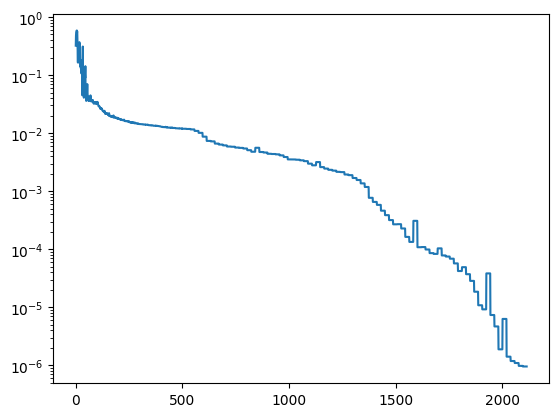

In [21]:
import matplotlib.pyplot as plt
plt.semilogy(res.logger.values)

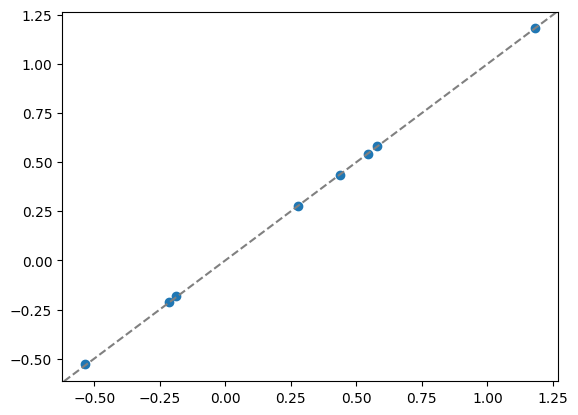

In [22]:
import matplotlib.pyplot as plt
plt.scatter(reference, res.solution)
plt.axline((0, 0), slope=1, linestyle="--", color="gray")
plt.show()